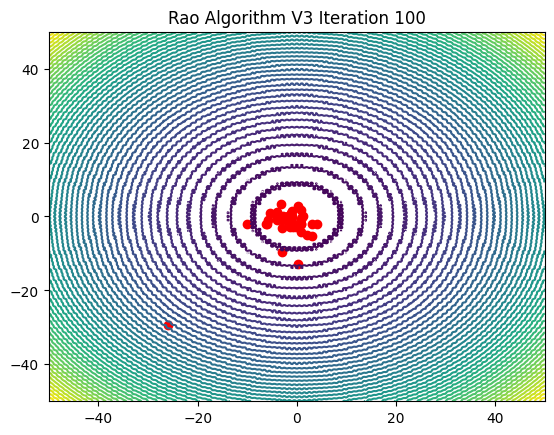

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Objective function (Rastrigin)
def F9_vectorized(X):
    return np.sum(X**2 - 10 * np.cos(2 * np.pi * X) + 10, axis=1)

# Initialize parameters
n_candidates = 40  # Population size
max_iterations = 100  # Number of iterations
x_range = (-50, 50)  # Range for the initial population

# Initialize the population
np.random.seed(42)
population = np.random.uniform(x_range[0], x_range[1], (n_candidates, 2))

# Function to calculate fitness
def calculate_fitness(population):
    return np.array([F9_vectorized(individual.reshape(1, -1)) for individual in population])

# Initialize fitness
fitness = calculate_fitness(population)

# Rao Algorithm Version 3
def rao_v3(population, fitness):
    history = []
    for _ in range(max_iterations):
        new_population = np.copy(population)
        for i in range(n_candidates):
            r1 = np.random.random()
            r2 = np.random.random()
            best = population[np.argmin(fitness)]
            worst = population[np.argmax(fitness)]
            random_individual = population[np.random.randint(0, n_candidates)]
            
            # Update rule
            new_population[i] = population[i] + \
                                r1 * (best - np.abs(worst)) + \
                                r2 * (np.logical_or(population[i], random_individual) - random_individual)
            
            # Ensure bounds are maintained
            new_population[i] = np.clip(new_population[i], x_range[0], x_range[1])
        
        # Evaluate new population
        new_fitness = calculate_fitness(new_population)
        
        # Replace old population with new if better
        for j in range(n_candidates):
            if new_fitness[j] < fitness[j]:
                population[j] = new_population[j]
                fitness[j] = new_fitness[j]
        
        history.append(population.copy())
    
    return population, history

# Run the algorithm
final_population, history = rao_v3(population, fitness)

# Prepare the contour plot data
bounds = (-50, 50)
X1 = np.linspace(bounds[0], bounds[1], 400)
X2 = np.linspace(bounds[0], bounds[1], 400)
X1, X2 = np.meshgrid(X1, X2)
Z = F9_vectorized(np.column_stack([X1.ravel(), X2.ravel()])).reshape(X1.shape)

# Set up the figure and axis for animation
fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter([], [], c='red')  # Candidates

# Update function for animation
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax.set_title(f'Rao Algorithm V3 Iteration {frame + 1}')
    return scatter,

# Create animation
ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

# Save animation as GIF
writer = PillowWriter(fps=5)  # Adjust fps for speed preference
ani.save("rao_algorithm_v3_anaz.gif", writer=writer)
plt.show()
